In [1]:
library(ggplot2)
library(ggtree)
library(ape)

Loading required package: treeio
ggtree v1.10.5  For help: https://guangchuangyu.github.io/ggtree

If you use ggtree in published research, please cite:
Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam. ggtree: an R package for visualization and annotation of phylogenetic trees with their covariates and other associated data. Methods in Ecology and Evolution 2017, 8(1):28-36, doi:10.1111/2041-210X.12628

Attaching package: ‘ape’

The following object is masked from ‘package:ggtree’:

    rotate

The following objects are masked from ‘package:treeio’:

    drop.tip, Nnode, Ntip



In [2]:
asv_tree <- read.tree("data/full_tree.nwk")
asv_tab <- read.table("data/asv_table.tab", comment.char="", header=1, skip=1, sep="\t", row.names=1)
taxonomy <- read.table("data/taxonomy.tsv", sep="\t", header=1, row.names=1)
cut_taxonomy_string <- function(x, n) {
    sp <- unlist(strsplit(x,";"))
    if (length(sp) >= n) {
        return(sp[n])
        }
    else {
        return(sp[length(sp)])
    }
}

In [3]:
plot_mrca_tree <- function(taxon_query, layout='circular') {
    targets <- grep(taxon_query, taxonomy$Taxon)
    taxon_ids <- rownames(taxonomy[targets,])
    asv_subtree <- extract.clade(asv_tree, getMRCA(asv_tree, taxon_ids))

    tree_taxon_ids <- asv_subtree$tip
    tip_labels <- unlist(
                      lapply(as.character(
                             taxonomy[tree_taxon_ids, 'Taxon']
                             ), 
                            function(x) cut_taxonomy_string(x, 7)
                            )
                         )
    tip_labels <- data.frame(taxa=tree_taxon_ids, classification=tip_labels)
    row.names(tip_labels) = NULL
    p <- ggtree(asv_subtree, layout=layout)
    if (layout == 'circular' || layout == 'radial') {
        p <- p %<+% tip_labels + geom_tiplab2(aes(label=classification))
    } else {
        p <- p %<+% tip_labels + geom_tiplab(aes(label=classification))
    }
    p
}

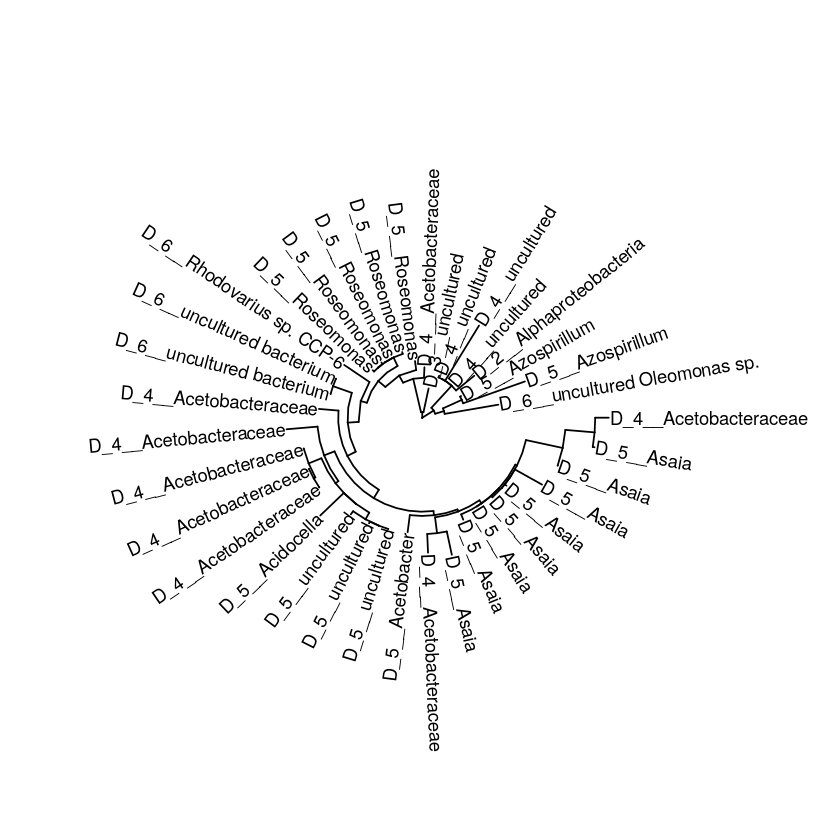

In [4]:
plot_mrca_tree('Acetobacterales') + xlim(0,0.35)

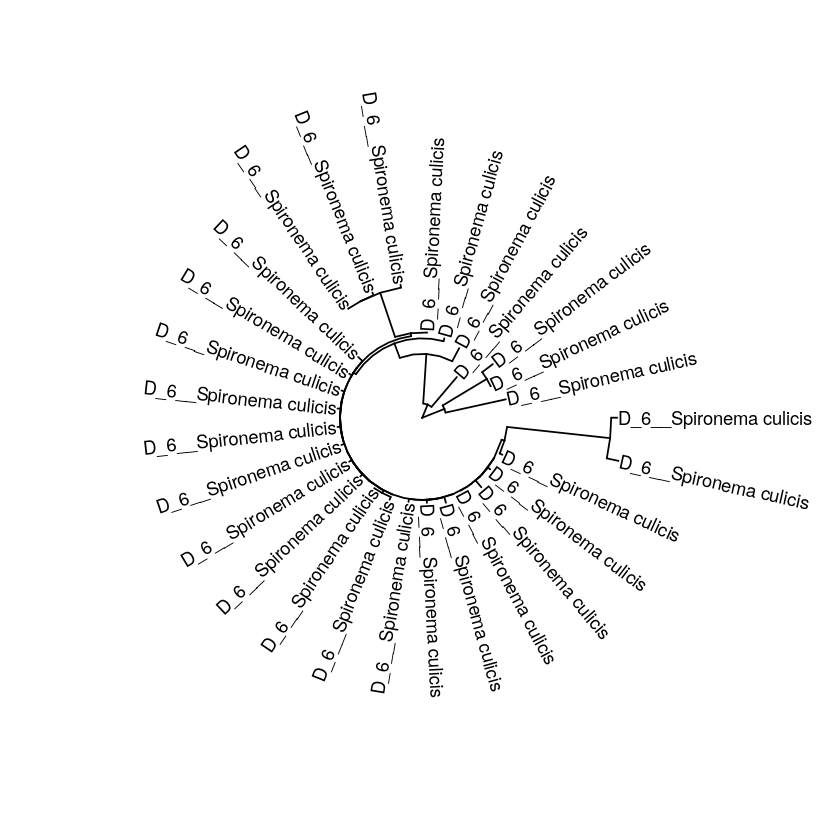

In [5]:
plot_mrca_tree('Spirochaetes') + xlim(0, 0.2)

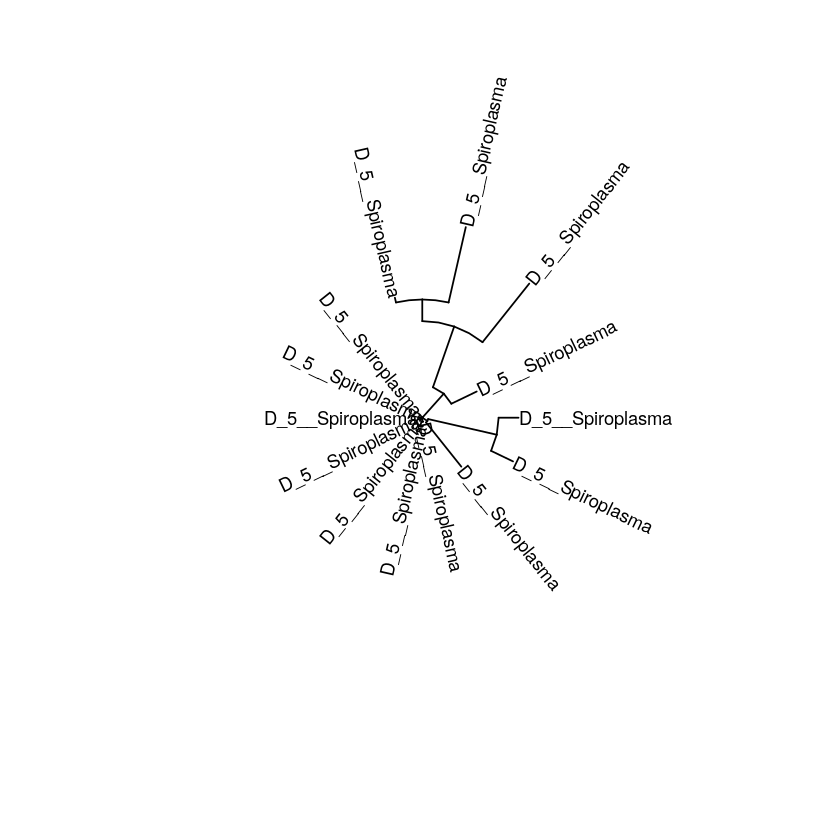

In [6]:
plot_mrca_tree('Tenericutes') + xlim(0,0.15)

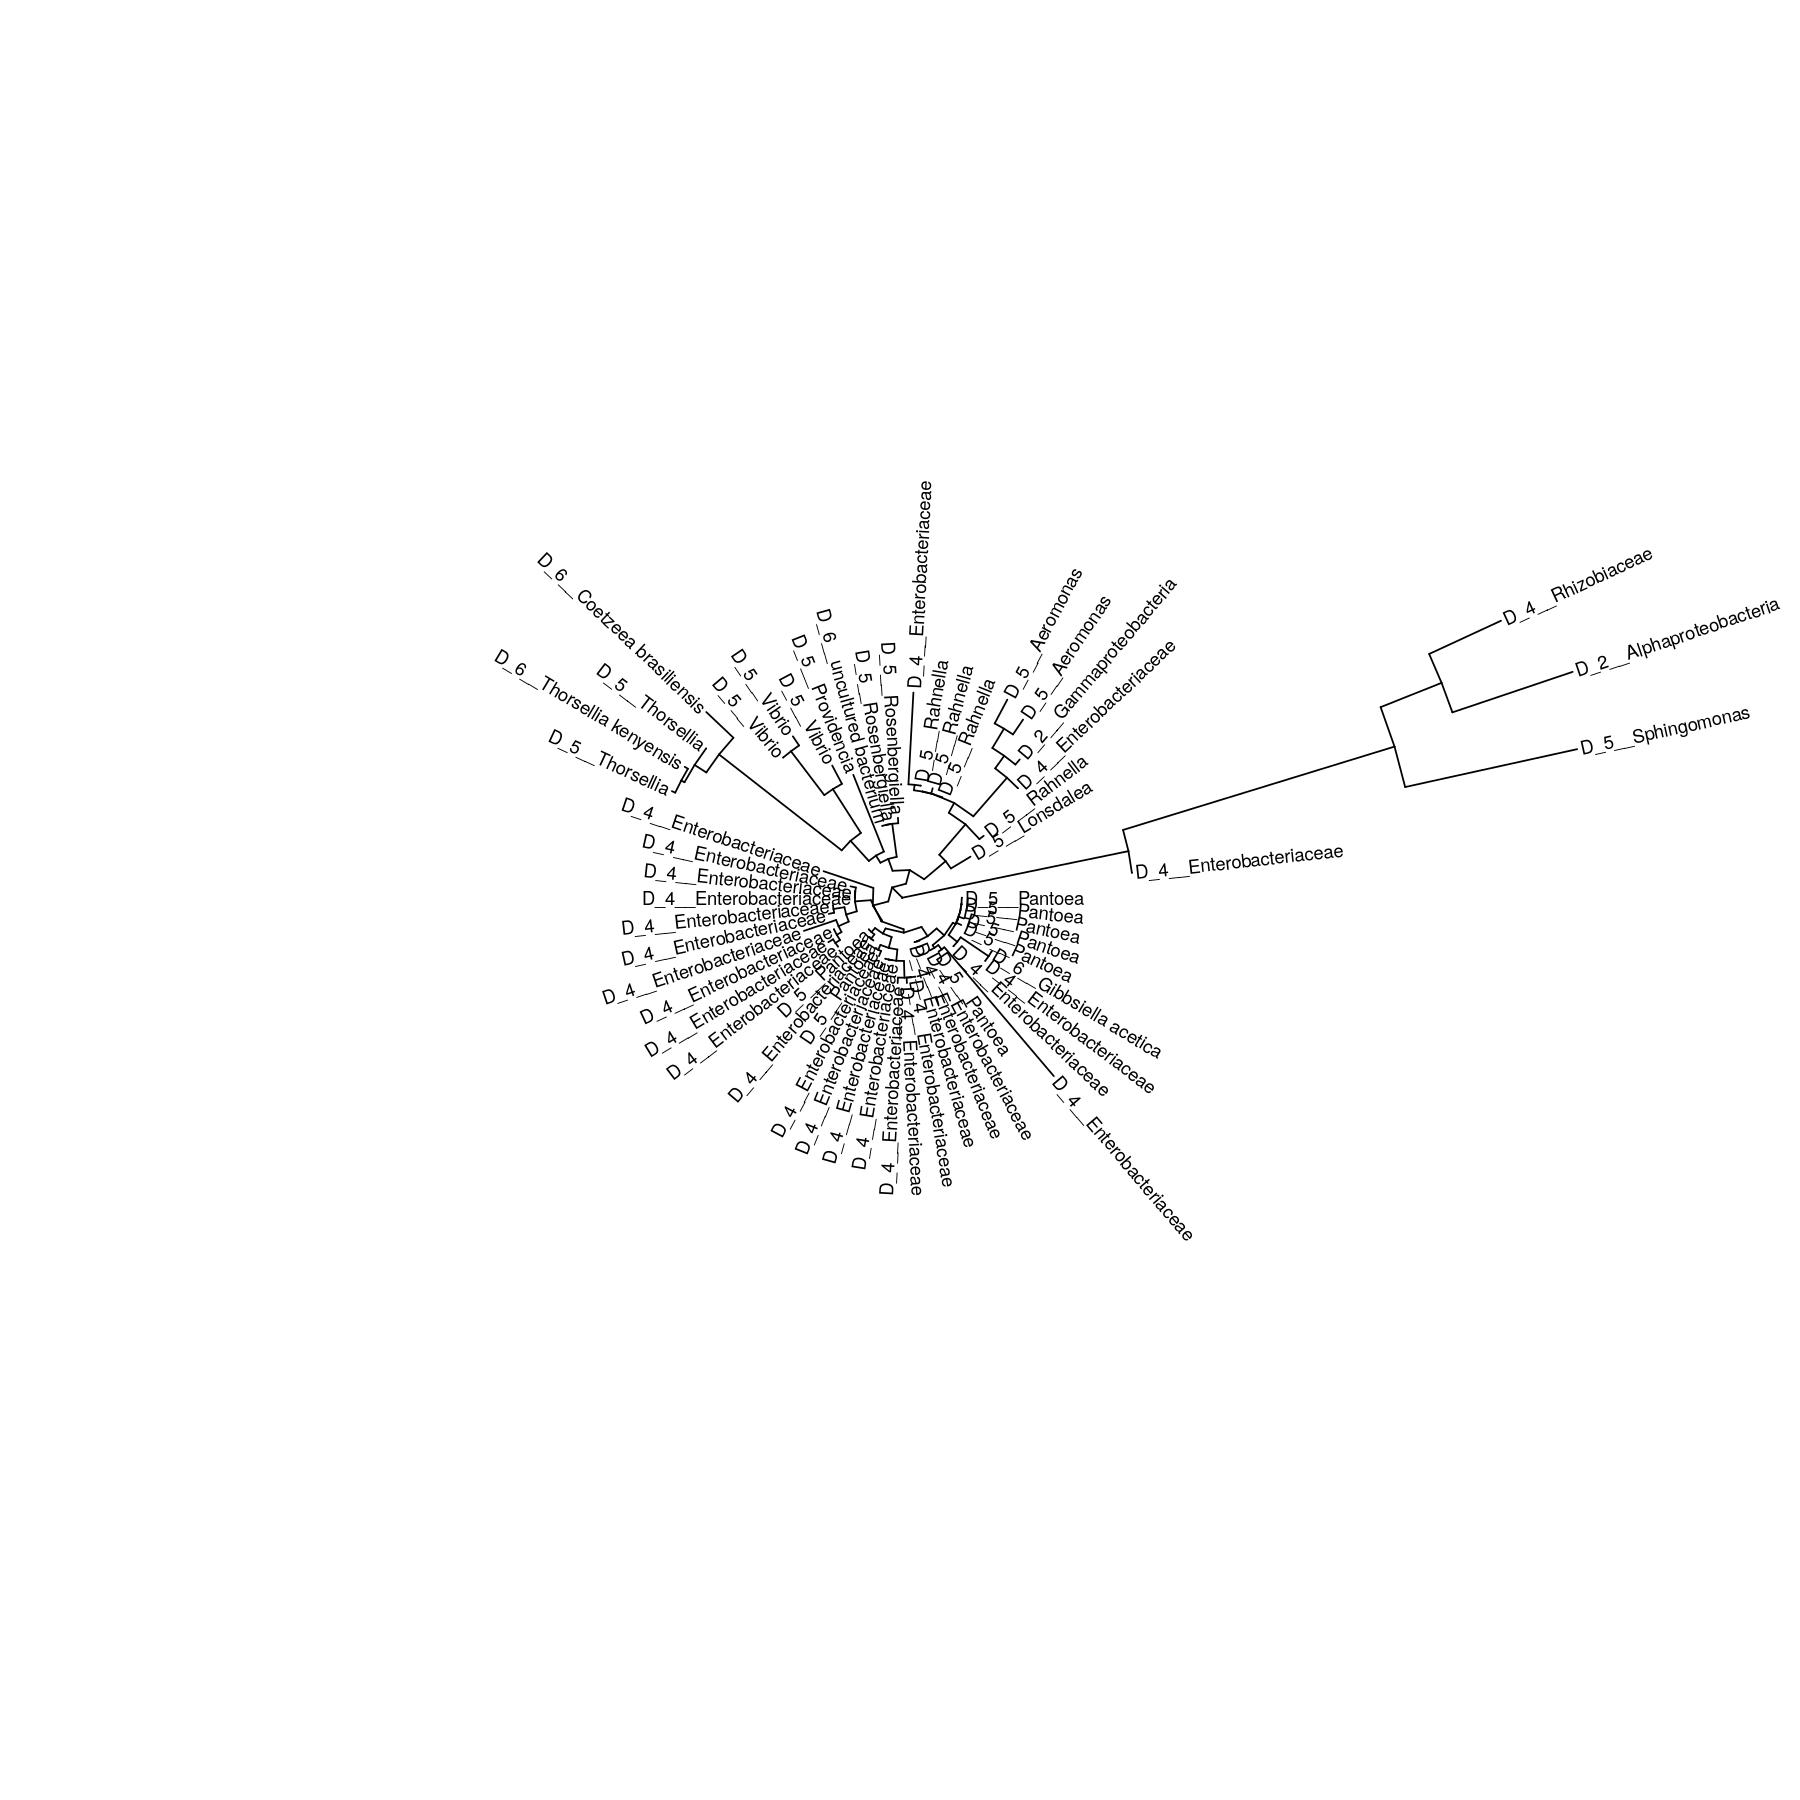

In [7]:
options(repr.plot.width=15, repr.plot.height=15)
plot_mrca_tree('Enterobacteriaceae')

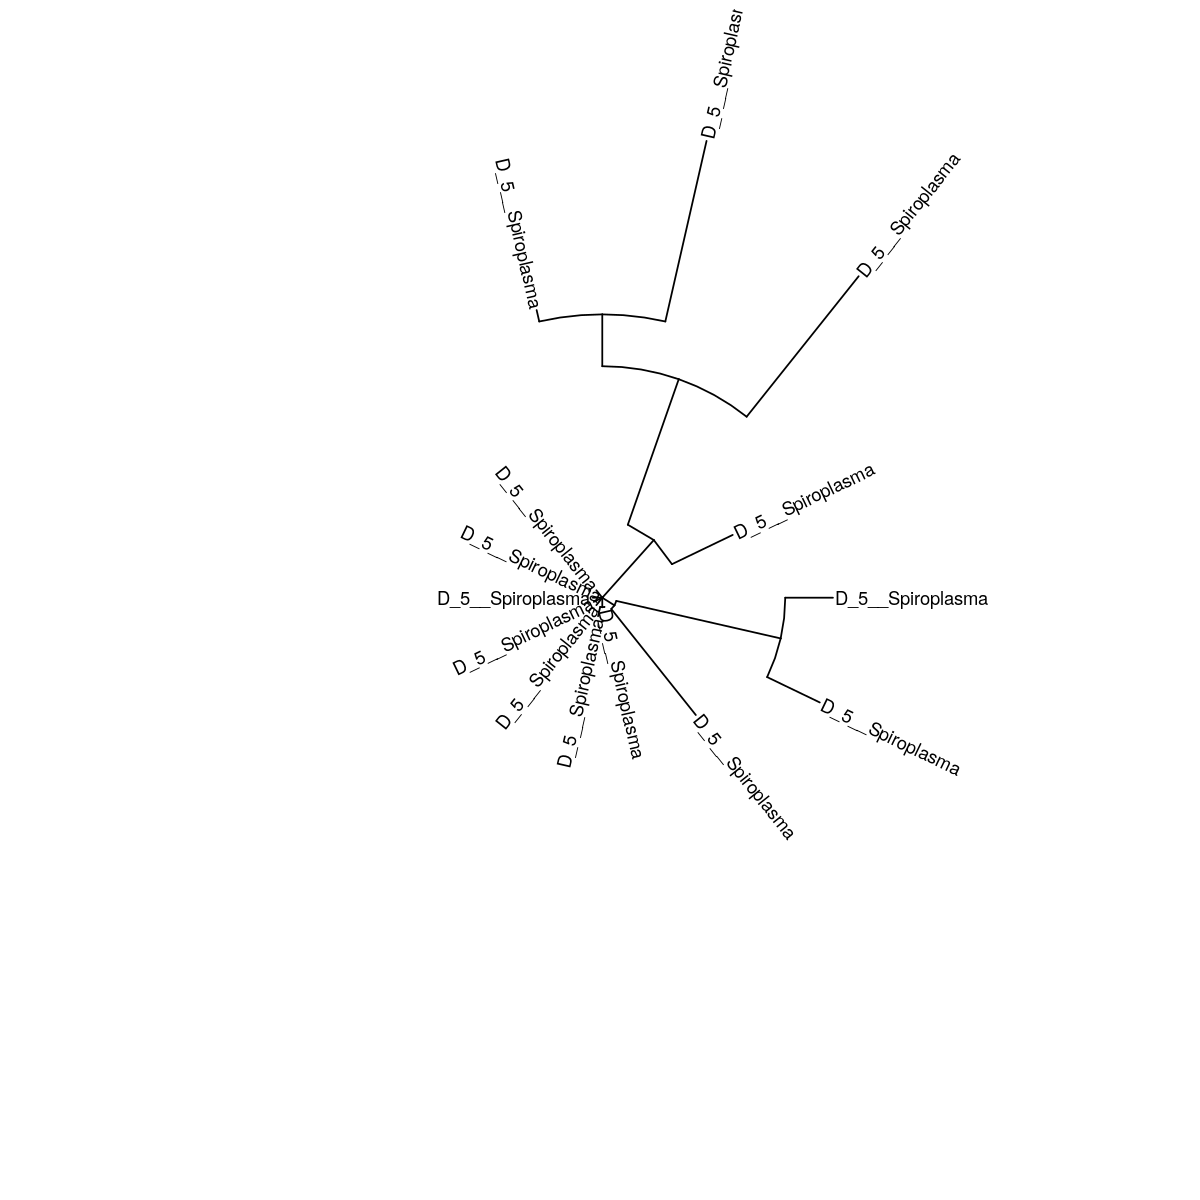

In [8]:
options(repr.plot.width=10, repr.plot.height=10)
plot_mrca_tree('Entomoplasmatales')

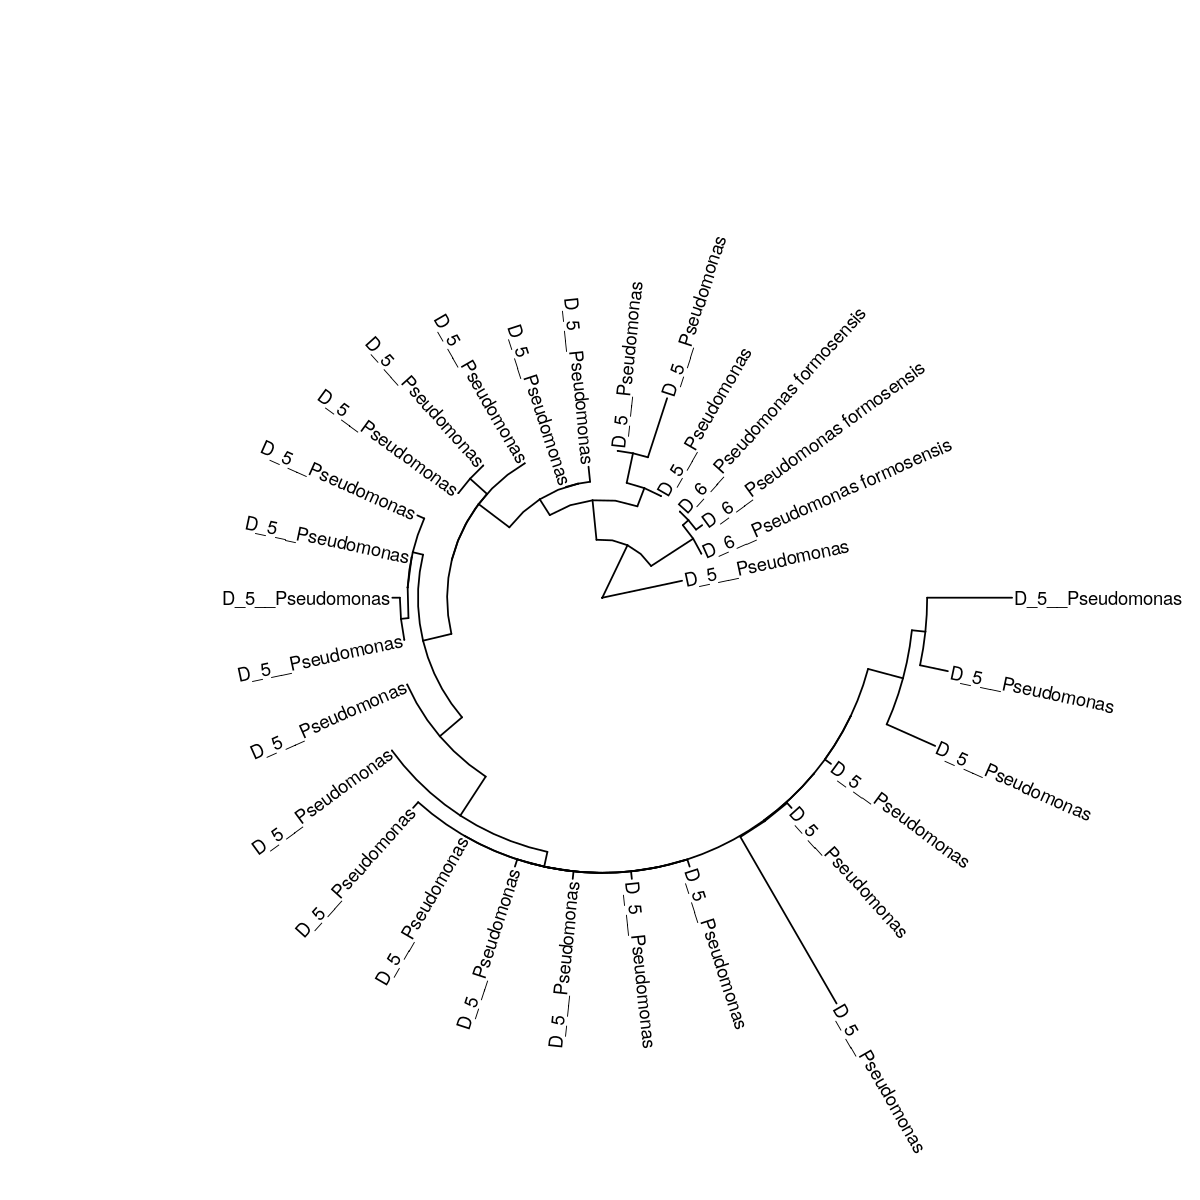

In [9]:
plot_mrca_tree('Pseudomonas')

In [ ]:
pdf("full_bacterial_tree.pdf", height=20, width=20)
plot_mrca_tree("Bacteria", 'daylight')
dev.off()

Iteration: 1


Average angle change [ 1 ] 0.1773052 


Iteration: 2


Average angle change [ 2 ] 0.7744706 


Iteration: 3


Average angle change [ 3 ] 0.8666557 


Iteration: 4


In [ ]:
sessionInfo()